<a href="https://colab.research.google.com/github/shahlabasheer/NLP-clustering/blob/main/NLP_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data set/abcnews-date-text (1).csv',nrows=1000)
df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
995,20030224,conference to focus on tuna fishery
996,20030224,council hosts farewell for mp
997,20030224,council resists eba roster pressure
998,20030224,customs house restoration opened


In [ ]:
txt=df.headline_text
txt

0      aba decides against community broadcasting lic...
1         act fire witnesses must be aware of defamation
2         a g calls for infrastructure protection summit
3               air nz staff in aust strike for pay rise
4          air nz strike to affect australian travellers
                             ...                        
995                  conference to focus on tuna fishery
996                        council hosts farewell for mp
997                  council resists eba roster pressure
998                     customs house restoration opened
999                dam water levels still critically low
Name: headline_text, Length: 1000, dtype: object

In [ ]:
txt=txt.str.replace('[^a-zA-Z0-9]+',' ')
txt

<ipython-input-4-4e7b82e11b12>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt=txt.str.replace('[^a-zA-Z0-9]+',' ')


0      aba decides against community broadcasting lic...
1         act fire witnesses must be aware of defamation
2         a g calls for infrastructure protection summit
3               air nz staff in aust strike for pay rise
4          air nz strike to affect australian travellers
                             ...                        
995                  conference to focus on tuna fishery
996                        council hosts farewell for mp
997                  council resists eba roster pressure
998                     customs house restoration opened
999                dam water levels still critically low
Name: headline_text, Length: 1000, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
import nltk
nltk.download('punkt')
stemmer=SnowballStemmer('english')
from nltk.tokenize import word_tokenize
txt=txt.apply(lambda x:[stemmer.stem(token.lower())for token in word_tokenize(x)]).apply(lambda token:' '.join(token))
txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0      aba decid against communiti broadcast licenc
1                act fire wit must be awar of defam
2         a g call for infrastructur protect summit
3          air nz staff in aust strike for pay rise
4         air nz strike to affect australian travel
                           ...                     
995                 confer to focus on tuna fisheri
996                     council host farewel for mp
997               council resist eba roster pressur
998                         custom hous restor open
999                dam water level still critic low
Name: headline_text, Length: 1000, dtype: object

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
txt=txt.apply(lambda x:[token for token in word_tokenize(x)if token not in sw]).apply(lambda token:' '.join(token))
txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        aba decid communiti broadcast licenc
1                act fire wit must awar defam
2         g call infrastructur protect summit
3           air nz staff aust strike pay rise
4      air nz strike affect australian travel
                        ...                  
995                 confer focus tuna fisheri
996                   council host farewel mp
997         council resist eba roster pressur
998                   custom hous restor open
999          dam water level still critic low
Name: headline_text, Length: 1000, dtype: object

In [ ]:
txt=txt.apply(lambda x:[token for token in word_tokenize(x) if len(token)>2]).apply(lambda token:' '.join(token))
txt

0      aba decid communiti broadcast licenc
1              act fire wit must awar defam
2         call infrastructur protect summit
3            air staff aust strike pay rise
4       air strike affect australian travel
                       ...                 
995               confer focus tuna fisheri
996                    council host farewel
997       council resist eba roster pressur
998                 custom hous restor open
999        dam water level still critic low
Name: headline_text, Length: 1000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
X=vec.fit_transform(txt)
print(X)

  (0, 1153)	0.4482035648206515
  (0, 275)	0.4482035648206515
  (0, 444)	0.3836511463824199
  (0, 546)	0.47488889587122124
  (0, 22)	0.47488889587122124
  (1, 551)	0.4246418596496586
  (1, 161)	0.4433712719268117
  (1, 1295)	0.4433712719268117
  (1, 2125)	0.4433712719268117
  (1, 774)	0.30277901858458506
  (1, 39)	0.3718466116939065
  (2, 1875)	0.507438706045383
  (2, 1523)	0.4738031252781932
  (2, 1019)	0.5985746919252476
  (2, 318)	0.3996559723940066
  (3, 1646)	0.391910671817033
  (3, 1418)	0.39927611253410555
  (3, 1855)	0.40750997472799744
  (3, 150)	0.39927611253410555
  (3, 1823)	0.45596583539595936
  (3, 65)	0.391910671817033
  (4, 1985)	0.4638196760768728
  (4, 153)	0.4638196760768728
  (4, 50)	0.4638196760768728
  (4, 1855)	0.4292132360963984
  :	:
  (994, 1832)	0.37615526866651305
  (994, 2088)	0.4010887251993005
  (994, 444)	0.35846469972407957
  (995, 781)	0.5155631654026962
  (995, 2009)	0.5155631654026962
  (995, 455)	0.5155631654026962
  (995, 796)	0.45009317639779456
  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


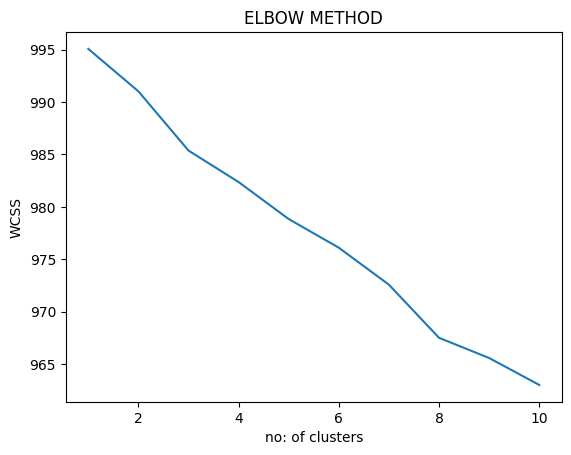

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=1)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('no: of clusters')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [ ]:
km=KMeans(n_clusters=9,random_state=1)
y=km.fit_predict(X)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([8, 8, 8, 8, 8, 0, 8, 4, 5, 4, 8, 8, 6, 8, 6, 8, 8, 8, 0, 5, 4, 8,
       8, 8, 8, 8, 8, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8,
       4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 1, 8, 8,
       8, 1, 8, 1, 8, 0, 2, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2,
       2, 2, 2, 2, 8, 8, 3, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       1, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 1, 8, 1, 8, 8, 6, 6, 8,
       8, 8, 8, 8, 8, 3, 3, 5, 5, 6, 3, 8, 8, 7, 8, 8, 0, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8,
       3, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 6, 0, 1, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 7, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       4, 8, 8, 8, 5, 3, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8,
       4, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 1, 4, 8, 4, 8, 8, 6, 7, 8, 8, 5, 6, 8,

In [ ]:
df['cluster']=y

In [ ]:
df

,publish_date,headline_text,cluster
0,20030219,aba decides against community broadcasting lic...,8
1,20030219,act fire witnesses must be aware of defamation,8
2,20030219,a g calls for infrastructure protection summit,8
3,20030219,air nz staff in aust strike for pay rise,8
4,20030219,air nz strike to affect australian travellers,8
...,...,...,...
995,20030224,conference to focus on tuna fishery,8
996,20030224,council hosts farewell for mp,8
997,20030224,council resists eba roster pressure,8
998,20030224,customs house restoration opened,0


In [ ]:
df['cluster']

0      8
1      8
2      8
3      8
4      8
      ..
995    8
996    8
997    8
998    0
999    8
Name: cluster, Length: 1000, dtype: int32

In [ ]:
df.loc[df['cluster']==0]

,publish_date,headline_text,cluster
5,20030219,ambitious olsson wins triple jump,0
18,20030219,bryant leads lakers to double overtime win,0
71,20030219,injured rios pulls out of buenos aires open,0
148,20030219,refshauge wins defamation court case,0
195,20030219,williams says tight bowling key to warriors win,0
258,20030220,esso wins against class action for longford gas,0
306,20030220,kirwan sticks with winning formula for ireland,0
330,20030220,mgladbach leave danger zone with home win,0
410,20030220,taipans win keeps play off dreams alive,0
418,20030220,tomasson gives milan narrow win over lokomotiv,0


In [ ]:
df.loc[df['cluster']==1]

,publish_date,headline_text,cluster
57,20030219,gilchrist backs rest policy,1
63,20030219,griffiths under fire over project knock back,1
67,20030219,hanson should go back where she came from nsw mp,1
69,20030219,health minister backs organ and tissue storage,1
110,20030219,nsw govt under fire for holding back vegetation,1
124,20030219,patterson defends decision not to attend health,1
126,20030219,patterson snubs health meeting to avoid lions den,1
196,20030219,wine chief bounces back from sacking,1
229,20030220,claim defence spending priority over health nt,1
288,20030220,houllier backs owen to break rush scoring record,1


In [ ]:
df.loc[df['cluster']==2]

,publish_date,headline_text,cluster
72,20030219,inquest finds mans death accidental,2
77,20030219,irish man arrested over omagh bombing,2
87,20030219,man arrested after central qld hijack attempt,2
88,20030219,man charged over cooma murder,2
89,20030219,man fined after aboriginal tent embassy raid,2
90,20030219,man jailed over keno fraud,2
91,20030219,man with knife hijacks light plane,2
212,20030220,beckham leads as man u cut down depleted juve,2
310,20030220,lawyers set to appeal mans sept 11 conviction,2
316,20030220,man apologises for plane hijack,2
